In [1]:
import pandas as pd

titanic_df = pd.read_csv("final_data_titanic.csv")

## Handling data normalization

Data normalization is the process of transforming data into a common scale or range, to eliminate differences in magnitude and make the data more comparable and interpretable. Normalization is an important step in data preprocessing, as it can improve the accuracy and performance of machine learning models and other data analysis techniques.

1. **Min-Max Normalization**

This method scales the data to a fixed range, typically between 0 and 1. The formula for min-max normalization is:

```python
x_norm = (x - x_min) / (x_max - x_min)
```

In [2]:
min_fare = titanic_df.Fare.min()
max_fare = titanic_df.Fare.max()

In [3]:
norm_fare = ( titanic_df.Fare - min_fare ) / (max_fare - min_fare )

In [4]:
norm_fare.describe()

count    867.000000
mean       0.169994
std        0.185967
min        0.000000
25%        0.051451
50%        0.089870
75%        0.193533
max        1.000000
Name: Fare, dtype: float64

In [5]:
titanic_df.Fare.describe()

count    867.000000
mean      26.087710
std       28.539027
min        0.000000
25%        7.895800
50%       13.791700
75%       29.700000
max      153.462500
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

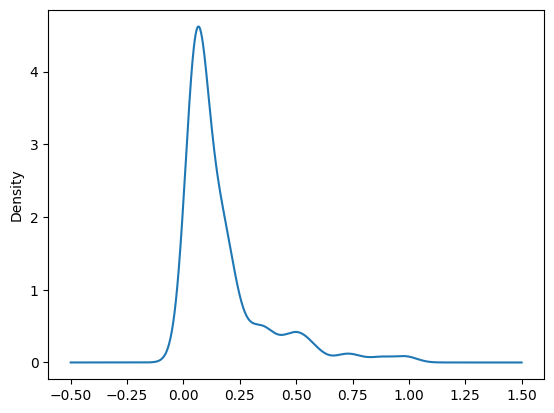

In [6]:
norm_fare.plot(kind = "kde")

<Axes: ylabel='Density'>

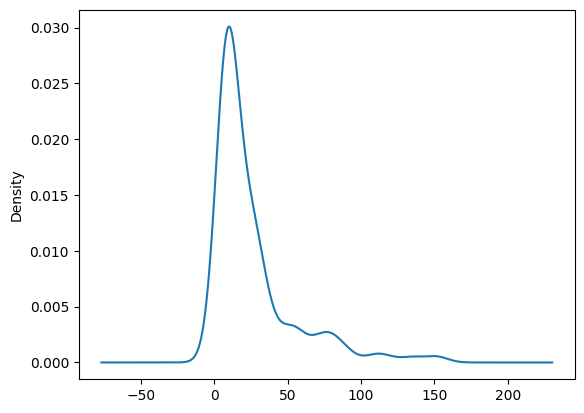

In [7]:
titanic_df.Fare.plot(kind = "kde")

### **What Min-Max Scaling Preserves:**
1. **Relative Order of Values (Monotonicity)**:  
   - If one value is greater than another before scaling, it remains greater after scaling.
   - Example: If \( x_1 < x_2 \) in the original data, then \( x'_1 < x'_2 \) after scaling.

2. **Proportional Spacing (Linear Transformation)**:  
   - The distance between values is proportionally reduced or expanded within the new scale.

3. **Feature Relationships**:  
   - If two features have a strong correlation before scaling, the correlation remains the same after scaling.

---

### **What Min-Max Scaling Does NOT Preserve:**
1. **Outlier Effects**:  
   - Since Min-Max scaling compresses all values into a fixed range (e.g., [0,1] or [-1,1]), outliers can **dominate the scaling** and distort patterns.
   - Example: If one value is an extreme outlier, all other values will be squashed closer together.

2. **Absolute Differences**:  
   - Since all values are mapped to a fixed range, differences between large and small values may lose interpretability.

3. **Gaussian Distributions**:  
   - If the original data is normally distributed, Min-Max scaling does not maintain the bell-shaped distribution.

---

### **Conclusion:**
- **For data with a uniform range and without extreme outliers**, Min-Max scaling **preserves patterns well**.
- **For data with outliers or a skewed distribution**, Min-Max scaling may **distort the structure**, and alternatives like **Z-score normalization (StandardScaler)** may be better.


In [8]:
# Sklearn

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

scaled_data = mm_scaler.fit_transform(titanic_df)

In [9]:
pd.DataFrame(scaled_data, columns= titanic_df.columns)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_enc
0,0.0,1.0,0.271174,0.125,0.000000,0.047243,0.0,0.0,1.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.464500,1.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.051641,0.0,1.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.346013,1.0,1.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.052456,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.5,0.334004,0.000,0.000000,0.084711,0.0,0.0,1.0,1.0
863,1.0,0.0,0.233476,0.000,0.000000,0.195487,1.0,1.0,0.0,1.0
864,0.0,1.0,0.343367,0.125,0.333333,0.152806,0.0,1.0,0.0,1.0
865,1.0,0.0,0.321438,0.000,0.000000,0.195487,1.0,0.0,1.0,0.0


2. **Z-score Normalization / StandardScaler**

   This method scales the data to have zero mean and unit variance. The formula for z-score normalization is:

```python
x_norm = (x - mean) / std
```

where `x` is the original value, `mean` and `std` are the mean and standard deviation of the data, respectively, and `x_norm` is the normalized value.

In [10]:
mean_fare = titanic_df.Fare.mean()
std_fare = titanic_df.Fare.std()

In [11]:
fare_norm = (titanic_df.Fare - mean_fare) / std_fare

In [13]:
fare_norm.describe()

count    867.000000
mean       0.000000
std        1.000000
min       -0.914107
25%       -0.637440
50%       -0.430849
75%        0.126574
max        4.463179
Name: Fare, dtype: float64

<Axes: ylabel='Density'>

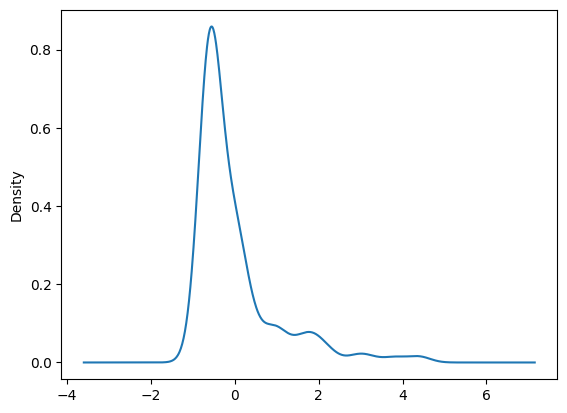

In [22]:
import numpy as np
fare_norm.plot(kind = "kde")

**Min-Max Scaler vs. StandardScaler: A Comparison**

Both **MinMaxScaler** and **StandardScaler** are commonly used for feature scaling in machine learning, but they behave differently and are suited for different situations.

**Comparison Table**
| Feature            | MinMaxScaler | StandardScaler |
|-------------------|-------------|---------------|
| **Range** | [0,1] (or custom range) | Mean = 0, Std = 1 |
| **Effect of Outliers** | Strong (compresses values) | Moderate (shifts distribution) |
| **Preserves Distribution?** | Yes (but not spacing) | No (reshapes to standard normal) |
| **Preserves Order?** | Yes | No (relative spacing changes) |
| **Best For?** | ML models needing bounded input (NN, KNN) | ML models assuming normal distribution (PCA, LR, SVM) |


In [23]:
# sklearn

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [24]:
norm_data = std_scaler.fit_transform(titanic_df)

In [25]:
pd.DataFrame(norm_data, columns= titanic_df.columns)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,Embarked_enc
0,-0.772454,0.801065,-0.586689,0.436130,-0.460625,-0.660449,-0.519037,-0.723689,0.723689,0.575778
1,1.294576,-1.644441,0.643942,0.436130,-0.460625,1.584556,1.926644,1.381809,-1.381809,-1.990800
2,1.294576,0.801065,-0.279031,-0.470644,-0.460625,-0.636784,-0.519037,1.381809,-1.381809,0.575778
3,1.294576,-1.644441,0.413198,0.436130,-0.460625,0.947050,1.926644,1.381809,-1.381809,0.575778
4,-0.772454,0.801065,0.413198,-0.470644,-0.460625,-0.632401,-0.519037,-0.723689,0.723689,0.575778
...,...,...,...,...,...,...,...,...,...,...
862,-0.772454,-0.421688,-0.202117,-0.470644,-0.460625,-0.458855,-0.519037,-0.723689,0.723689,0.575778
863,1.294576,-1.644441,-0.817432,-0.470644,-0.460625,0.137165,1.926644,1.381809,-1.381809,0.575778
864,-0.772454,0.801065,-0.144802,0.436130,2.066981,-0.092478,-0.519037,1.381809,-1.381809,0.575778
865,1.294576,-1.644441,-0.279031,-0.470644,-0.460625,0.137165,1.926644,-0.723689,0.723689,-1.990800


3. **Log transformation:**

   This method applies a logarithmic function to the data, to reduce the range of values and make the data more symmetric and normally distributed. The formula for log normalization is:

```python
x_norm = log(x)
```

where `x` is the original value, and `x_norm` is the normalized value.

In [43]:
import numpy as np

peak = 5 * 10e2   # 500000
n = 250            # points per side

k = np.log(peak)
growth = np.exp(np.linspace(1, k, n))
decay = np.exp(np.linspace(k, 1, n))
data = np.concatenate([growth, decay[1:]])

<Axes: >

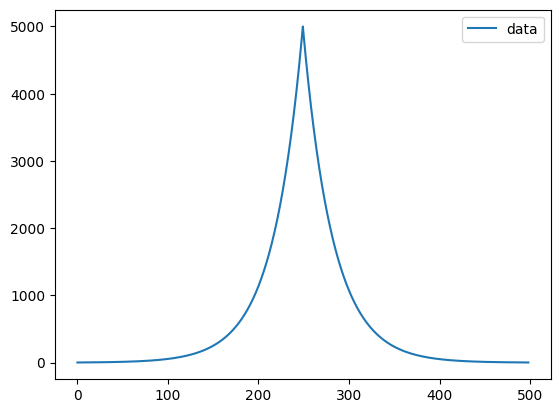

In [44]:
pd.DataFrame(data, columns=["data"]).plot(kind = "line")

<Axes: >

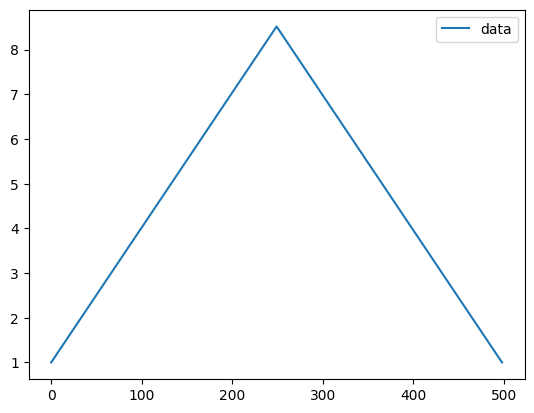

In [45]:
pd.DataFrame(np.log(data), columns=["data"]).plot(kind = "line")

4. **Power Transformation:**

   This method applies a power function to the data, to adjust the skewness and kurtosis of the distribution and make the data more symmetric and normally distributed. The formula for power normalization is:

```python
x_norm = sign(x) * abs(x) ** a
```

where `x` is the original value, `a` is the power parameter (typically between 0 and 1), `sign` is the sign function that returns the sign of x (+1 or -1), and `abs` is the absolute value function. The normalized value `x_norm` is obtained by raising the absolute value of `x` to the power of `a`, and then multiplying it by the sign of `x` to preserve the direction of the data.

<Axes: ylabel='Density'>

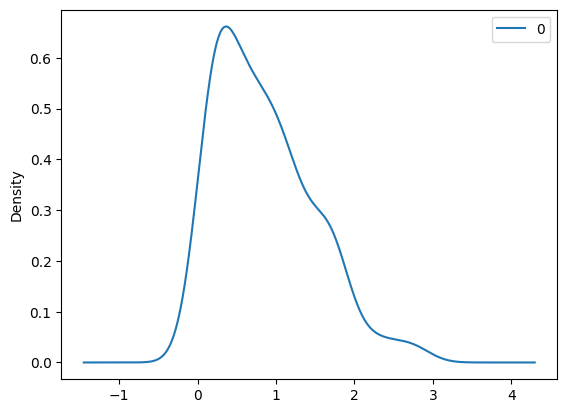

In [52]:
from scipy.stats import skewnorm

data = pd.DataFrame(skewnorm.rvs(25, size = 200))

data.plot.kde()

In [55]:
pow_tansformer = lambda series, pow_factor : np.sign(series) * np.power(np.abs(series), pow_factor)

<Axes: ylabel='Density'>

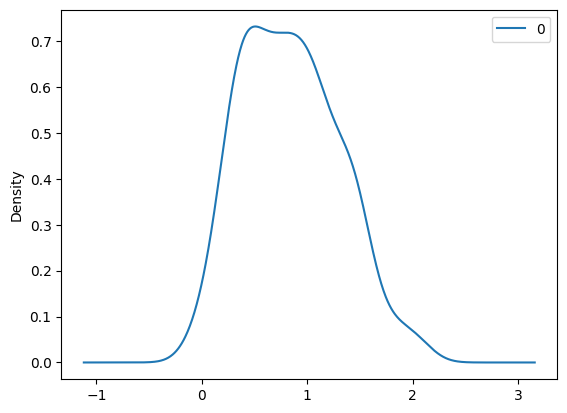

In [64]:
trans_data = pow_tansformer(data, 0.7)
trans_data.plot.kde()